# Import required packages

In [537]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier               
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Import and set datasets

In [538]:
# import train value dataset
train_values_df=pd.read_csv("train_values.csv")

# import test value dataset
test_values_df=pd.read_csv("test_values.csv")

create combined dataset of train values and test values

In [539]:
all_df=pd.concat([train_values_df, test_values_df], sort=True).reset_index(drop=True) #concatinating train and test data frames

In [540]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             74250 non-null  float64
 1   basin                  74250 non-null  object 
 2   construction_year      74250 non-null  int64  
 3   date_recorded          74250 non-null  object 
 4   district_code          74250 non-null  int64  
 5   extraction_type        74250 non-null  object 
 6   extraction_type_class  74250 non-null  object 
 7   extraction_type_group  74250 non-null  object 
 8   funder                 69746 non-null  object 
 9   gps_height             74250 non-null  int64  
 10  id                     74250 non-null  int64  
 11  installer              69718 non-null  object 
 12  latitude               74250 non-null  float64
 13  lga                    74250 non-null  object 
 14  longitude              74250 non-null  float64
 15  ma

In [541]:
all_df.describe()

amount_tsh  construction_year  district_code    gps_height  \
count   74250.000000       74250.000000   74250.000000  74250.000000   
mean      318.685704        1298.463650       5.629077    665.667313   
std      2906.762364         952.349375       9.641636    692.761033   
min         0.000000           0.000000       0.000000    -90.000000   
25%         0.000000           0.000000       2.000000      0.000000   
50%         0.000000        1986.000000       3.000000    364.000000   
75%        20.000000        2004.000000       5.000000   1317.000000   
max    350000.000000        2013.000000      80.000000   2777.000000   

                 id      latitude     longitude   num_private    population  \
count  74250.000000  7.425000e+04  74250.000000  74250.000000  74250.000000   
mean   37124.500000 -5.701771e+00     34.074262      0.462330    180.750828   
std    21434.273081  2.944969e+00      6.572519     11.537879    471.086120   
min        0.000000 -1.164944e+01      0.000000      0.000000      0.000000   
25%    18562.250000 -8.525675e+00     33.086819      0.000000      0.000000   
50%    37124.500000 -5.026540e+00     34.907475      0.000000     25.000000   
75%    55686.750000 -3.325058e+00     37.181685      0.000000    215.000000   
max    74249.000000 -2.000000e-08     40.345193   1776.000000  30500.000000   

        region_code  
count  74250.000000  
mean      15.265414  
std       17.508907  
min        1.000000  
25%        5.000000  
50%       12.000000  
75%       17.000000  
max       99.000000

# Visulaizing data

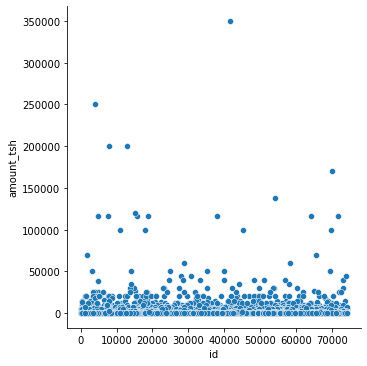

In [542]:
sns.relplot(data=all_df, x="id", y="amount_tsh")

uniques values of basin column

In [543]:
all_df.basin.unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

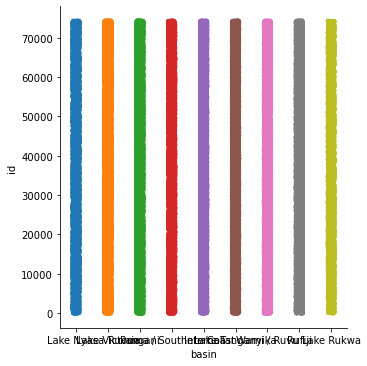

In [544]:
sns.catplot(x="basin", y="id", data=all_df)

<AxesSubplot:xlabel='basin', ylabel='count'>

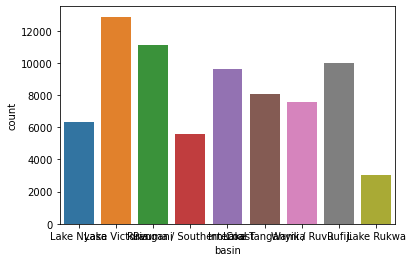

In [545]:
sns.countplot(x="basin", data=all_df)

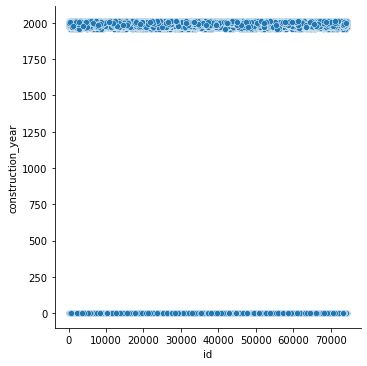

In [546]:
sns.relplot(data=all_df, x="id", y="construction_year")

uniques values of district_code column

In [547]:
all_df.district_code.unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
        0, 80, 67])

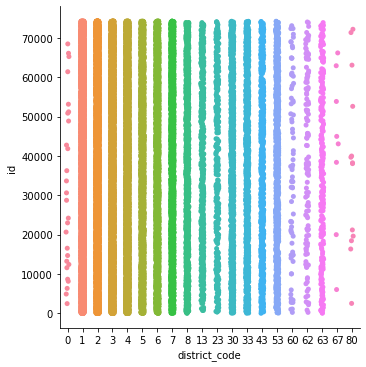

In [548]:
sns.catplot(x="district_code", y="id", data=all_df)

<AxesSubplot:xlabel='district_code', ylabel='count'>

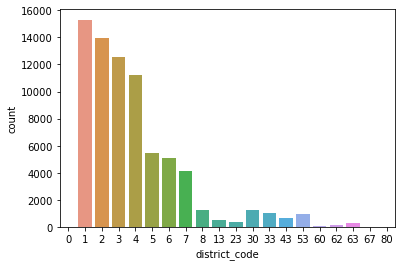

In [549]:
sns.countplot(x="district_code", data=all_df)

uniques values of extraction_type column

In [550]:
all_df.extraction_type.unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'ksb', 'mono', 'windmill', 'afridev', 'other - rope pump',
       'india mark iii', 'other - swn 81', 'other - play pump', 'cemo',
       'climax', 'walimi', 'other - mkulima/shinyanga'], dtype=object)

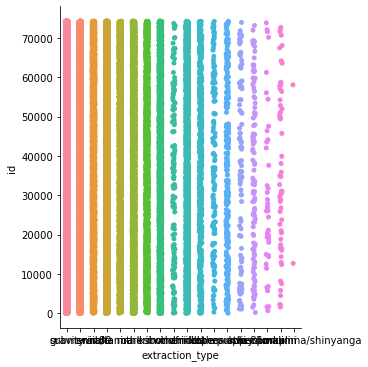

In [551]:
sns.catplot(x="extraction_type", y="id", data=all_df)

<AxesSubplot:xlabel='extraction_type', ylabel='count'>

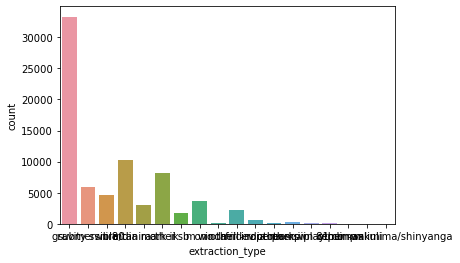

In [552]:
sns.countplot(x="extraction_type", data=all_df)

uniques values of extraction_type_class column

In [553]:
all_df.extraction_type_class.unique()

array(['gravity', 'submersible', 'handpump', 'other', 'motorpump',
       'wind-powered', 'rope pump'], dtype=object)

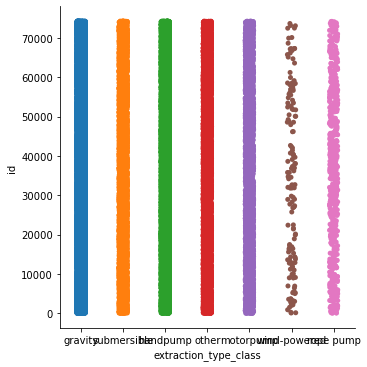

In [554]:
sns.catplot(x="extraction_type_class", y="id", data=all_df)

<AxesSubplot:xlabel='extraction_type_class', ylabel='count'>

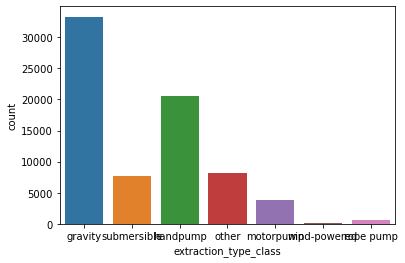

In [555]:
sns.countplot(x="extraction_type_class", data=all_df)

uniques values of extraction_type_group column

In [556]:
all_df.extraction_type_group.unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'mono', 'wind-powered', 'afridev', 'rope pump',
       'india mark iii', 'other handpump', 'other motorpump'],
      dtype=object)

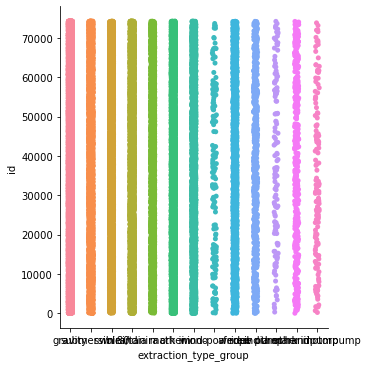

In [557]:
sns.catplot(x="extraction_type_group", y="id", data=all_df)

<AxesSubplot:xlabel='extraction_type_group', ylabel='count'>

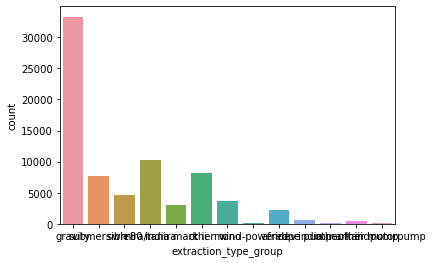

In [558]:
sns.countplot(x="extraction_type_group", data=all_df)

uniques values of funder column

In [559]:
funder_unique_values = all_df.funder.unique()

In [560]:
len(funder_unique_values)

2141

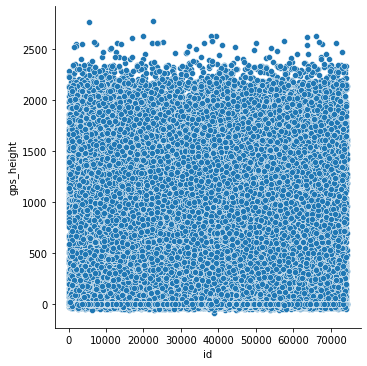

In [561]:
sns.relplot(data=all_df, x="id", y="gps_height")

uniques values of installer column

In [562]:
installer_unique_values = all_df.installer.unique()

In [563]:
len(installer_unique_values)

2411

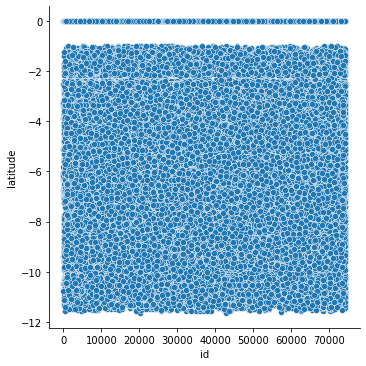

In [564]:
sns.relplot(data=all_df, x="id", y="latitude")

uniques values of lga column

In [565]:
lga_unique_values = all_df.lga.unique()

In [566]:
len(lga_unique_values)

125

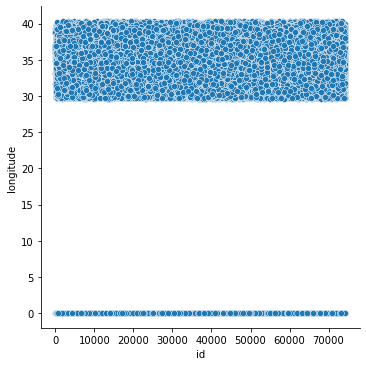

In [567]:
sns.relplot(data=all_df, x="id", y="longitude")

uniques values of management column

In [568]:
management_unique_values = all_df.management.unique()

In [569]:
len(management_unique_values)

12

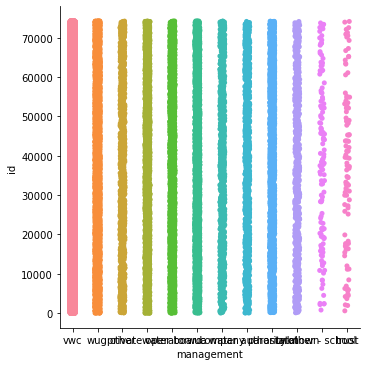

In [570]:
sns.catplot(x="management", y="id", data=all_df)

<AxesSubplot:xlabel='management', ylabel='count'>

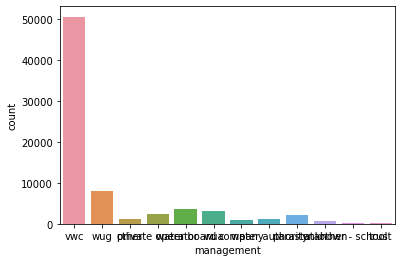

In [571]:
sns.countplot(x="management", data=all_df)

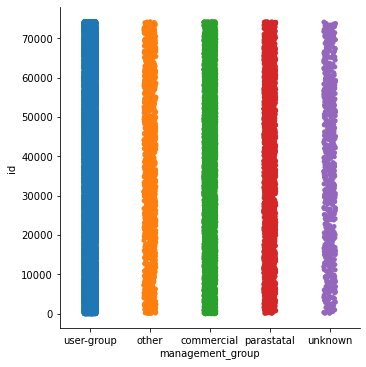

In [572]:
sns.catplot(x="management_group", y="id", data=all_df)

<AxesSubplot:xlabel='management_group', ylabel='count'>

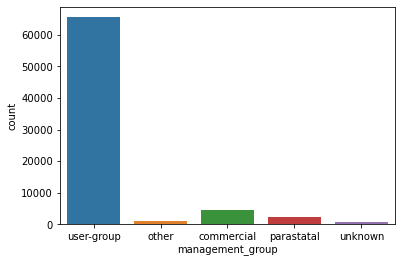

In [573]:
sns.countplot(x="management_group", data=all_df)

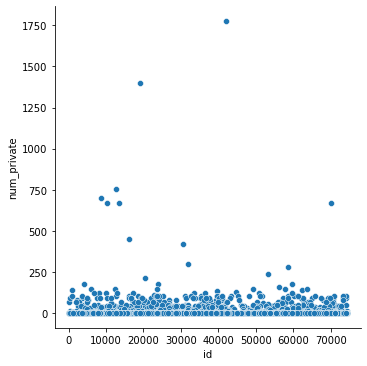

In [574]:
sns.relplot(data=all_df, x="id", y="num_private")

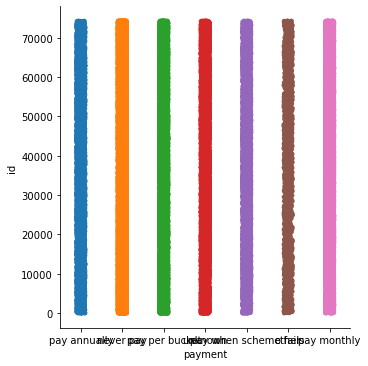

In [575]:
sns.catplot(x="payment", y="id", data=all_df)

<AxesSubplot:xlabel='payment', ylabel='count'>

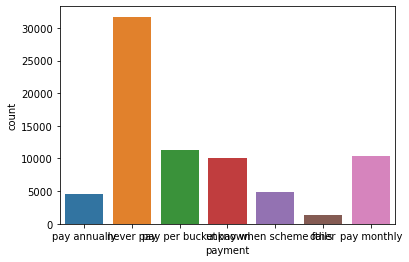

In [576]:
sns.countplot(x="payment", data=all_df)

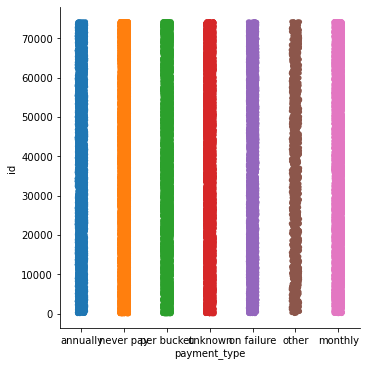

In [577]:
sns.catplot(x="payment_type", y="id", data=all_df)

<AxesSubplot:xlabel='payment_type', ylabel='count'>

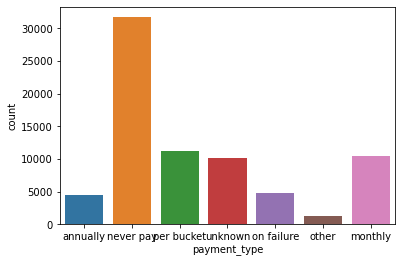

In [578]:
sns.countplot(x="payment_type", data=all_df)

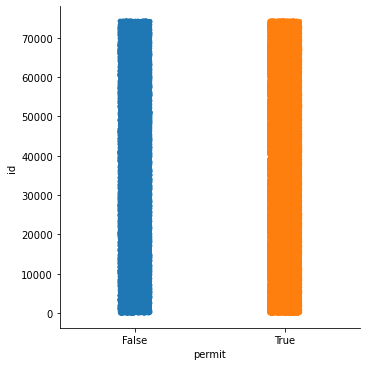

In [579]:
sns.catplot(x="permit", y="id", data=all_df)

<AxesSubplot:xlabel='payment_type', ylabel='count'>

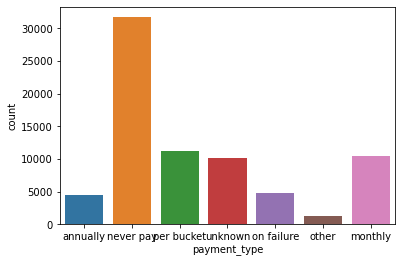

In [580]:
sns.countplot(x="payment_type", data=all_df)

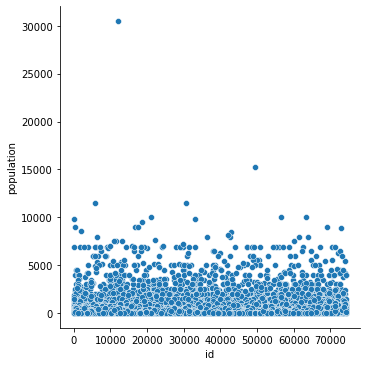

In [581]:
sns.relplot(data=all_df, x="id", y="population")

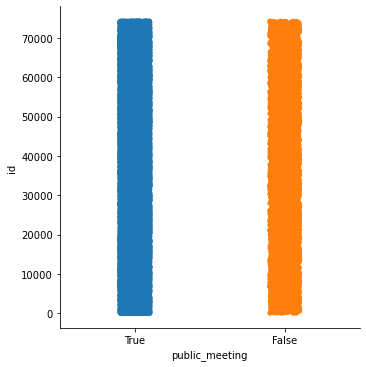

In [582]:
sns.catplot(x="public_meeting", y="id", data=all_df)

<AxesSubplot:xlabel='public_meeting', ylabel='count'>

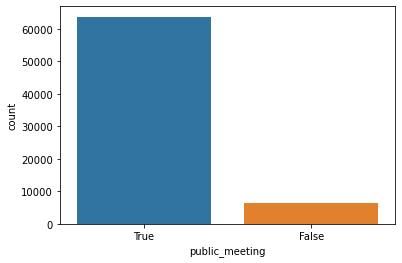

In [583]:
sns.countplot(x="public_meeting", data=all_df)

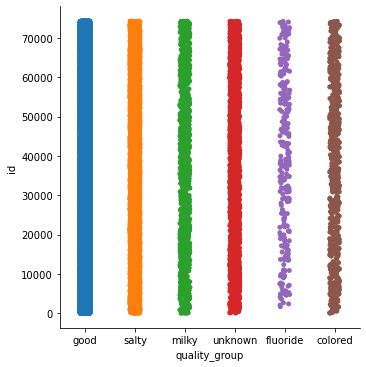

In [584]:
sns.catplot(x="quality_group", y="id", data=all_df)

<AxesSubplot:xlabel='quality_group', ylabel='count'>

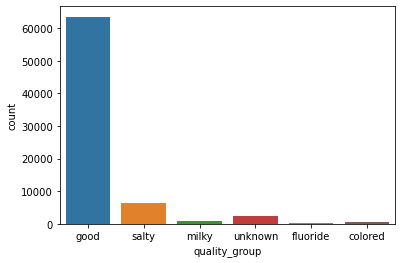

In [585]:
sns.countplot(x="quality_group", data=all_df)

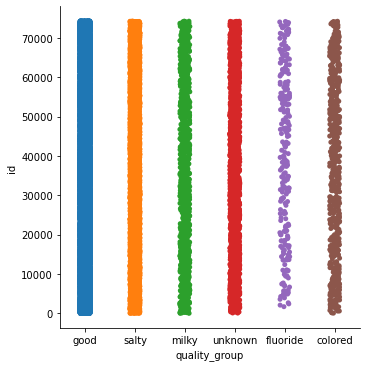

In [586]:
sns.catplot(x="quality_group", y="id", data=all_df)

<AxesSubplot:xlabel='quality_group', ylabel='count'>

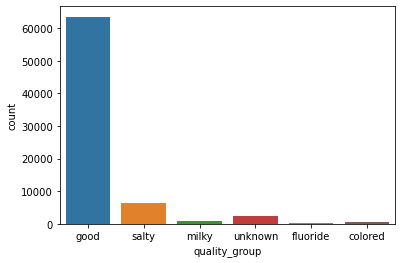

In [587]:
sns.countplot(x="quality_group", data=all_df)

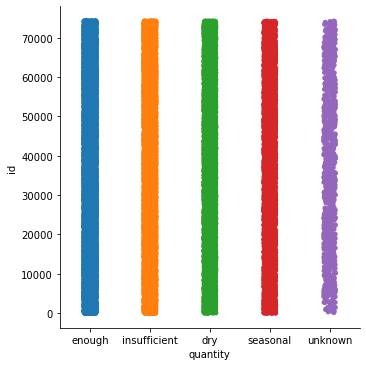

In [588]:
sns.catplot(x="quantity", y="id", data=all_df)

<AxesSubplot:xlabel='quantity', ylabel='count'>

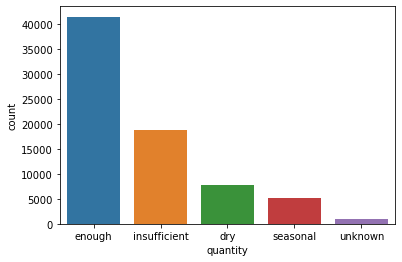

In [589]:
sns.countplot(x="quantity", data=all_df)

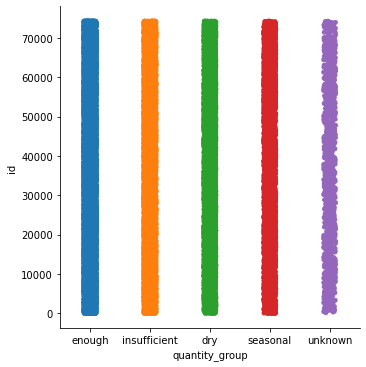

In [590]:
sns.catplot(x="quantity_group", y="id", data=all_df)

<AxesSubplot:xlabel='quantity_group', ylabel='count'>

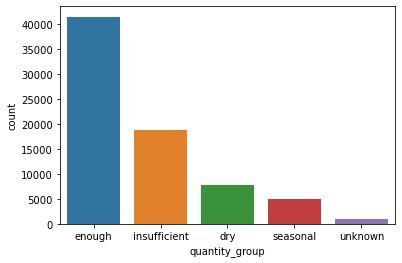

In [591]:
sns.countplot(x="quantity_group", data=all_df)

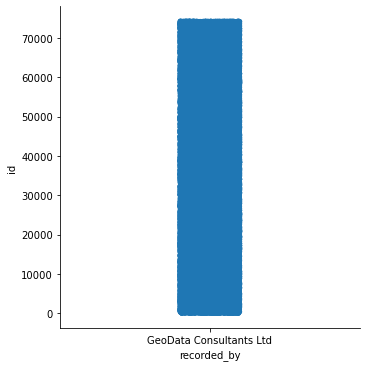

In [592]:
sns.catplot(x="recorded_by", y="id", data=all_df)

<AxesSubplot:xlabel='quantity_group', ylabel='count'>

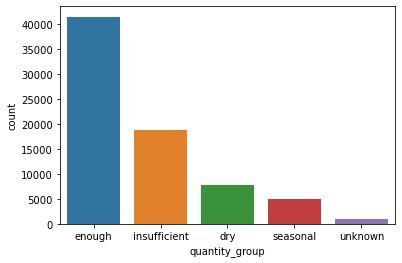

In [593]:
sns.countplot(x="quantity_group", data=all_df)

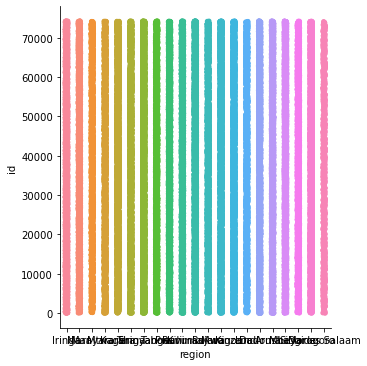

In [594]:
sns.catplot(x="region", y="id", data=all_df)

<AxesSubplot:xlabel='region', ylabel='count'>

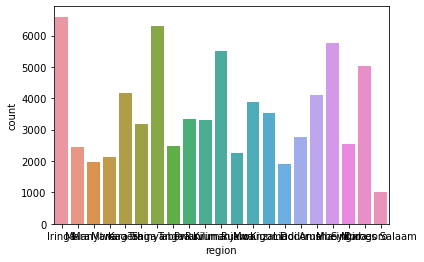

In [595]:
sns.countplot(x="region", data=all_df)

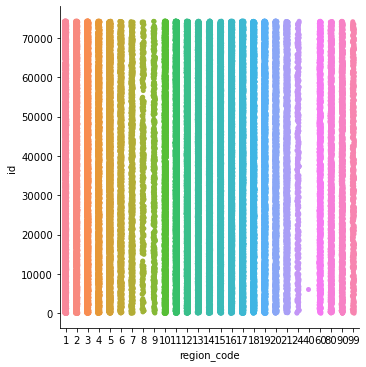

In [596]:
sns.catplot(x="region_code", y="id", data=all_df)

<AxesSubplot:xlabel='region_code', ylabel='count'>

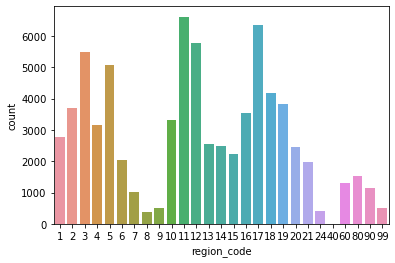

In [597]:
sns.countplot(x="region_code", data=all_df)

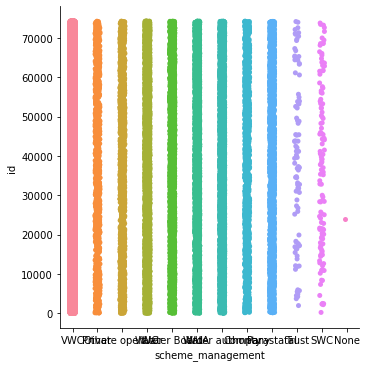

In [598]:
sns.catplot(x="scheme_management", y="id", data=all_df)

<AxesSubplot:xlabel='scheme_management', ylabel='count'>

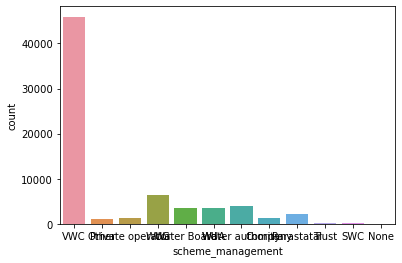

In [599]:
sns.countplot(x="scheme_management", data=all_df)

uniques values of scheme_name column

In [600]:
scheme_name_unique_values = all_df.scheme_name.unique()

In [601]:
len(scheme_name_unique_values)

2869

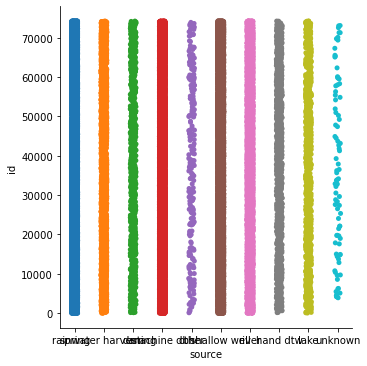

In [602]:
sns.catplot(x="source", y="id", data=all_df)

<AxesSubplot:xlabel='source', ylabel='count'>

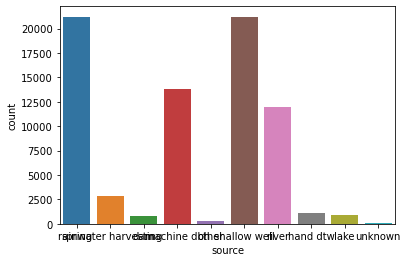

In [603]:
sns.countplot(x="source", data=all_df)

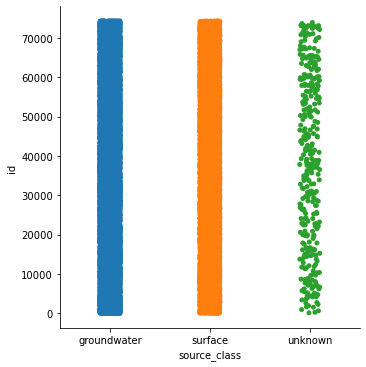

In [604]:
sns.catplot(x="source_class", y="id", data=all_df)

<AxesSubplot:xlabel='source_class', ylabel='count'>

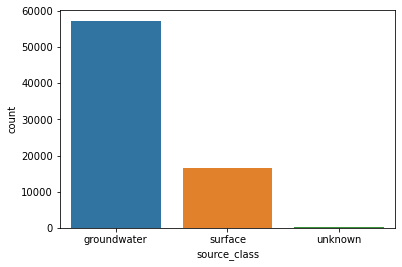

In [605]:
sns.countplot(x="source_class", data=all_df)

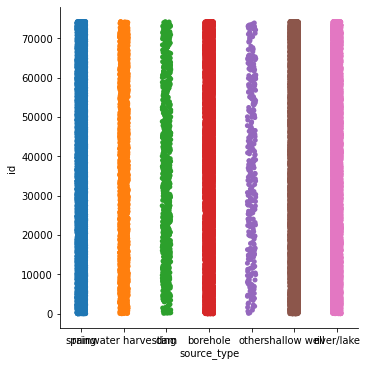

In [606]:
sns.catplot(x="source_type", y="id", data=all_df)

<AxesSubplot:xlabel='source_type', ylabel='count'>

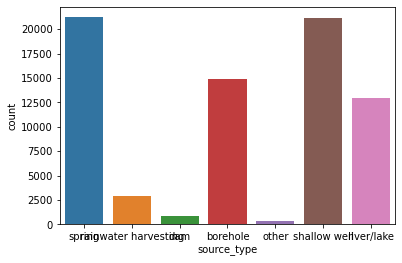

In [607]:
sns.countplot(x="source_type", data=all_df)

uniques values of subvillage column

In [608]:
subvillage_unique_values = all_df.subvillage.unique()

In [609]:
len(subvillage_unique_values)

21426

uniques values of ward column

In [610]:
ward_unique_values = all_df.ward.unique()

In [611]:
len(ward_unique_values)

2098

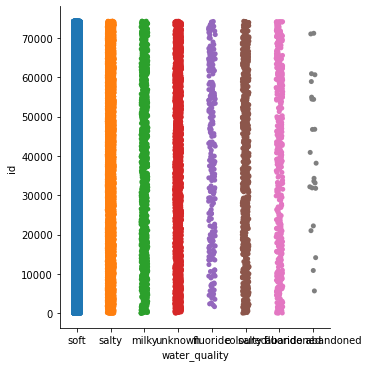

In [612]:
sns.catplot(x="water_quality", y="id", data=all_df)

<AxesSubplot:xlabel='water_quality', ylabel='count'>

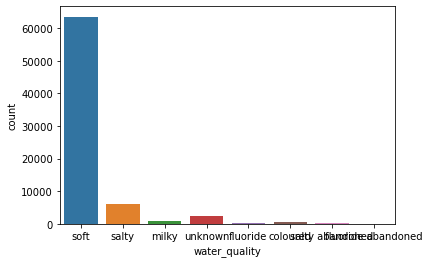

In [613]:
sns.countplot(x="water_quality", data=all_df)

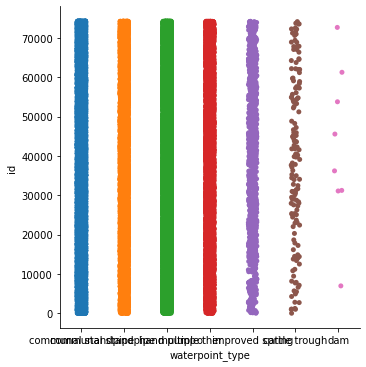

In [614]:
sns.catplot(x="waterpoint_type", y="id", data=all_df)

<AxesSubplot:xlabel='waterpoint_type', ylabel='count'>

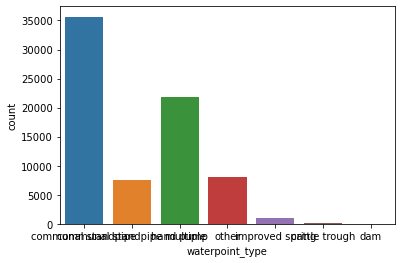

In [615]:
sns.countplot(x="waterpoint_type", data=all_df)

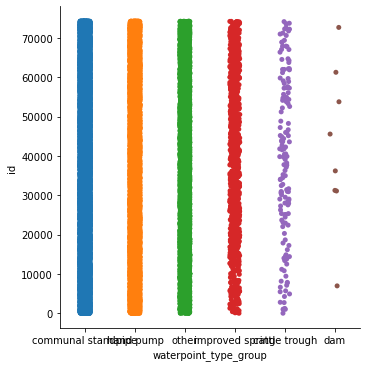

In [616]:
sns.catplot(x="waterpoint_type_group", y="id", data=all_df)

<AxesSubplot:xlabel='waterpoint_type_group', ylabel='count'>

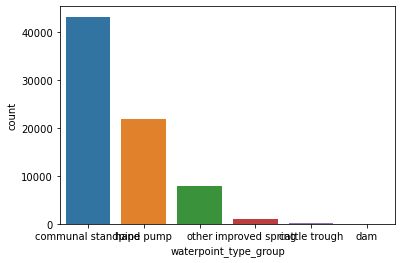

In [617]:
sns.countplot(x="waterpoint_type_group", data=all_df)

uniques values of wpt_name column

In [618]:
wpt_name_unique_values = all_df.wpt_name.unique()

In [619]:
len(wpt_name_unique_values)

45684

# Handling outliers

amount_tsh, construction_year, longitude columns has outliers

**Handle outliers in construction_year**

Let's get 0 outlier values count in construction_year column

In [620]:
len(all_df[all_df['construction_year']==0])

25969

Let's replce 0 values with mean of the non zero values of construction_year

In [621]:
all_df['construction_year'][all_df['construction_year']!=0].mean()

1996.8709430210642

In [622]:
all_df.loc[(all_df['construction_year'] == 0), 'construction_year'] = 1997

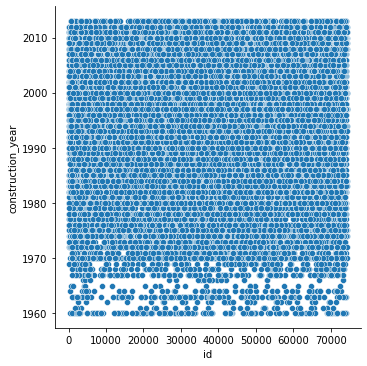

In [623]:
sns.relplot(data=all_df, x="id", y="construction_year")

**Handle outliers in longitude**

Let's get 0 outlier values count in longitude column

In [624]:
len(all_df[all_df['longitude']==0])

2269

Let's replce 0 values with mean of the non zero values of longitude

In [625]:
all_df['longitude'][all_df['longitude']!=0].mean()

35.14835835700376

In [626]:
all_df.loc[(all_df['longitude'] == 0), 'longitude'] = 35.148

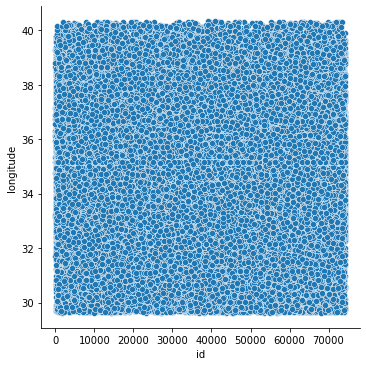

In [627]:
sns.relplot(data=all_df, x="id", y="longitude")

# Modify features

**Drop id column**

id is a unique value to each row. Therefore it is not useful for predictions.

In [628]:
all_df.drop('id', inplace=True, axis=1)

**Drop num_private column**

num_private is not a useful value for predictions

In [629]:
all_df.drop('num_private', inplace=True, axis=1)

**Drop recorded_by column**

The recorded_by column has only one value. Therefore it is not useful for predictions.

In [630]:
all_df.drop('recorded_by', inplace=True, axis=1)

**Modify installer feature**

Replace 0 value with 'missing'

In [631]:
all_df['installer'].replace(to_replace = '0', value ='missing' , inplace=True)

Fill missing values with 'missing'

In [632]:
all_df['installer'].fillna(value='missing',inplace=True)

Replacing the spelling mistakes and collect same categories in same name

In [633]:
all_df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

all_df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)

all_df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

all_df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

all_df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

all_df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

all_df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

all_df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)

all_df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

all_df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

all_df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

all_df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

all_df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [634]:
all_df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)

all_df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)

all_df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)

all_df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)

all_df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)

all_df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)

all_df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)

all_df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)

all_df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)

all_df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

installers which has less than 400 value counts together and named them others.

In [635]:
installer_high = ['DWE','missing','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


all_df.loc[~all_df["installer"].isin(installer_high), "installer"] = "Others"

uniques values of installer column

In [636]:
installer_unique_values = all_df.installer.unique()

In [637]:
len(installer_unique_values)

17

Analyse missing values

In [638]:
all_df.isna().sum().sort_values(ascending=False)#misssing values

scheme_name              35258
scheme_management         4846
funder                    4504
public_meeting            4155
permit                    3793
subvillage                 470
ward                         0
source_type                  0
water_quality                0
population                   0
source                       0
waterpoint_type              0
waterpoint_type_group        0
region_code                  0
region                       0
quantity_group               0
quantity                     0
quality_group                0
source_class                 0
amount_tsh                   0
basin                        0
gps_height                   0
construction_year            0
date_recorded                0
district_code                0
extraction_type              0
extraction_type_class        0
extraction_type_group        0
installer                    0
payment_type                 0
latitude                     0
lga                          0
longitud

**Modify funder feature**

filling 0 values with 'missing'

In [639]:
all_df['funder'].replace(to_replace = '0', value ='missing' , inplace=True)

filling missing values with 'missing'

In [640]:
all_df['funder'].fillna(value='missing',inplace=True)

take most common 20 values of funder

In [641]:
all_df['funder'].value_counts().head(20)

Government Of Tanzania    11299
missing                    5484
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
District Council           1037
Private Individual         1034
Dwsp                       1012
Norad                       949
Germany Republi             765
Water                       739
Tcrs                        735
Ministry Of Water           728
Dwe                         605
Name: funder, dtype: int64

funder which has less value counts collect together and named them others

In [642]:
funder_high = ['Danida','missing','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

all_df.loc[~all_df["funder"].isin(funder_high), "funder"] = "Others"

uniques values of funder column

In [643]:
funder_unique_values = all_df.funder.unique()

In [644]:
len(funder_unique_values)

21

Analyse missing values

In [645]:
all_df.isna().sum().sort_values(ascending=False)#misssing values

scheme_name              35258
scheme_management         4846
public_meeting            4155
permit                    3793
subvillage                 470
water_quality                0
ward                         0
source_type                  0
source_class                 0
population                   0
waterpoint_type              0
waterpoint_type_group        0
region_code                  0
region                       0
quantity_group               0
quantity                     0
quality_group                0
source                       0
amount_tsh                   0
basin                        0
payment_type                 0
construction_year            0
date_recorded                0
district_code                0
extraction_type              0
extraction_type_class        0
extraction_type_group        0
funder                       0
gps_height                   0
installer                    0
latitude                     0
lga                          0
longitud

# Feature Scaling

find float columns

In [646]:
float_cols = all_df.select_dtypes('float64').columns
float_cols

Index(['amount_tsh', 'latitude', 'longitude'], dtype='object')

find int columns

In [647]:
int_cols = all_df.select_dtypes('int64').columns
int_cols

Index(['construction_year', 'district_code', 'gps_height', 'population',
       'region_code'],
      dtype='object')

Let's scale amount_tsh, latitude, longitude, gps_height, population columns

In [648]:
scaler = StandardScaler()
all_df[['amount_tsh', 'latitude', 'longitude', 'gps_height', 'population']] = scaler.fit_transform(all_df[['amount_tsh', 'latitude', 'longitude', 'gps_height', 'population']])

In [649]:
all_df.head()

amount_tsh                    basin  construction_year date_recorded  \
0    1.954529               Lake Nyasa               1999    2011-03-14   
1   -0.109637            Lake Victoria               2010    2013-03-06   
2   -0.101036                  Pangani               2009    2013-02-25   
3   -0.109637  Ruvuma / Southern Coast               1986    2013-01-28   
4   -0.109637            Lake Victoria               1997    2011-07-13   

   district_code extraction_type extraction_type_class extraction_type_group  \
0              5         gravity               gravity               gravity   
1              2         gravity               gravity               gravity   
2              4         gravity               gravity               gravity   
3             63     submersible           submersible           submersible   
4              1         gravity               gravity               gravity   

   funder  gps_height  ...                  scheme_name                source  \
0  Others    1.045581  ...                        Roman                spring   
1  Others    1.058572  ...                          NaN  rainwater harvesting   
2  Others    0.029350  ...  Nyumba ya mungu pipe scheme                   dam   
3  Unicef   -0.581254  ...                          NaN           machine dbh   
4  Others   -0.960897  ...                          NaN  rainwater harvesting   

  source_class           source_type  subvillage        ward water_quality  \
0  groundwater                spring    Mnyusi B    Mundindi          soft   
1      surface  rainwater harvesting     Nyamara       Natta          soft   
2      surface                   dam     Majengo     Ngorika          soft   
3  groundwater              borehole  Mahakamani    Nanyumbu          soft   
4      surface  rainwater harvesting  Kyanyamisa  Nyakasimbi          soft   

               waterpoint_type waterpoint_type_group              wpt_name  
0           communal standpipe    communal standpipe                  none  
1           communal standpipe    communal standpipe              Zahanati  
2  communal standpipe multiple    communal standpipe           Kwa Mahundi  
3  communal standpipe multiple    communal standpipe  Zahanati Ya Nanyumbu  
4           communal standpipe    communal standpipe               Shuleni  

[5 rows x 37 columns]

# Encoding columns

**All object columns that does not have missing values are encoded**

In [650]:
labelencoder = LabelEncoder()

In [651]:
not_null_cols = all_df.columns[~all_df.isnull().any()]
obj_cols = all_df.select_dtypes('object').columns
not_null_obj_cols =  set(not_null_cols).intersection(obj_cols)

not_null_obj_cols

{'basin',
 'date_recorded',
 'extraction_type',
 'extraction_type_class',
 'extraction_type_group',
 'funder',
 'installer',
 'lga',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'quality_group',
 'quantity',
 'quantity_group',
 'region',
 'source',
 'source_class',
 'source_type',
 'ward',
 'water_quality',
 'waterpoint_type',
 'waterpoint_type_group',
 'wpt_name'}

In [652]:
len(not_null_obj_cols)

24

In [653]:
for col in (not_null_obj_cols):
    all_df[col]=labelencoder.fit_transform(all_df[col])

# Filling missing values

analyse misssing values

In [654]:
all_df.isna().sum().sort_values(ascending=False)

scheme_name              35258
scheme_management         4846
public_meeting            4155
permit                    3793
subvillage                 470
water_quality                0
ward                         0
source_type                  0
source_class                 0
population                   0
waterpoint_type              0
waterpoint_type_group        0
region_code                  0
region                       0
quantity_group               0
quantity                     0
quality_group                0
source                       0
amount_tsh                   0
basin                        0
payment_type                 0
construction_year            0
date_recorded                0
district_code                0
extraction_type              0
extraction_type_class        0
extraction_type_group        0
funder                       0
gps_height                   0
installer                    0
latitude                     0
lga                          0
longitud

**Handle missing values in scheme_name**

uniques values of scheme_name column

In [655]:
all_df.scheme_name.unique()

array(['Roman', nan, 'Nyumba ya mungu pipe scheme', ..., 'Grumeti',
       'BL Vetenary', 'MIGA'], dtype=object)

In [656]:
len(all_df.scheme_name.unique())

2869

Since 0.4749 of scheme_name values are missing, we remove scheme_name column.

In [657]:
all_df.drop('scheme_name', inplace=True, axis=1)

**Handle missing values in scheme_management**

uniques values of scheme_management column

In [658]:
scheme_management_values = all_df.scheme_management.unique()
scheme_management_values

array(['VWC', 'Other', nan, 'Private operator', 'WUG', 'Water Board',
       'WUA', 'Water authority', 'Company', 'Parastatal', 'Trust', 'SWC',
       'None'], dtype=object)

remove nan from scheme_management_values

In [659]:
scheme_management_values = np.delete(scheme_management_values,2)
scheme_management_values

array(['VWC', 'Other', 'Private operator', 'WUG', 'Water Board', 'WUA',
       'Water authority', 'Company', 'Parastatal', 'Trust', 'SWC', 'None'],
      dtype=object)

In [660]:
mapping_dic = {}
for i in range(len(scheme_management_values)):
    mapping_dic[scheme_management_values[i]]=i

In [661]:
mapping_dic

{'VWC': 0,
 'Other': 1,
 'Private operator': 2,
 'WUG': 3,
 'Water Board': 4,
 'WUA': 5,
 'Water authority': 6,
 'Company': 7,
 'Parastatal': 8,
 'Trust': 9,
 'SWC': 10,
 'None': 11}

label encoding by mapping

In [662]:
all_df['scheme_management'] = all_df['scheme_management'].map(mapping_dic)

analyse correlation of the scheme_management column with other columns

In [663]:
all_df_corr = all_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
all_df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
all_df_corr[all_df_corr['Feature 1'] == 'scheme_management']

Feature 1              Feature 2  Correlation Coefficient
24   scheme_management      scheme_management                 1.000000
60   scheme_management       management_group                 0.472297
103  scheme_management          date_recorded                 0.246500
140  scheme_management           source_class                 0.197860
177  scheme_management               latitude                 0.163481
257  scheme_management        waterpoint_type                 0.123912
270  scheme_management  waterpoint_type_group                 0.118705
293  scheme_management            region_code                 0.111804
307  scheme_management          district_code                 0.108238
322  scheme_management      construction_year                 0.098927
365  scheme_management                   ward                 0.086968
391  scheme_management                payment                 0.082493
395  scheme_management               quantity                 0.080031
398  scheme_management         quantity_group                 0.080031
436  scheme_management              installer                 0.073380
466  scheme_management          quality_group                 0.068174
468  scheme_management             gps_height                 0.067998
566  scheme_management                    lga                 0.048751
573  scheme_management        extraction_type                 0.047295
599  scheme_management                 funder                 0.044890
628  scheme_management             management                 0.042189
736  scheme_management          water_quality                 0.030045
760  scheme_management             population                 0.027338
779  scheme_management              longitude                 0.025929
796  scheme_management                 source                 0.024048
815  scheme_management                 region                 0.021547
846  scheme_management             amount_tsh                 0.018078
863  scheme_management  extraction_type_class                 0.017228
876  scheme_management           payment_type                 0.016672
894  scheme_management  extraction_type_group                 0.015322
932  scheme_management            source_type                 0.012245
934  scheme_management                  basin                 0.012205
964  scheme_management               wpt_name                 0.009942

scheme_management has high correlation with management_group

In [664]:
mode_values = all_df.groupby(['management_group'])['scheme_management'].agg(pd.Series.mode)
mode_values

management_group
0    6.0
1    1.0
2    8.0
3    0.0
4    0.0
Name: scheme_management, dtype: float64

fill scheme_management with values that has highest frequency in each management_group

In [665]:
all_df.loc[(all_df['management_group'] == 0) & (all_df['scheme_management'].isna()), 'scheme_management'] = 6

In [666]:
all_df.loc[(all_df['management_group'] == 1) & (all_df['scheme_management'].isna()), 'scheme_management'] = 1

In [667]:
all_df.loc[(all_df['management_group'] == 2) & (all_df['scheme_management'].isna()), 'scheme_management'] = 8

In [668]:
all_df.loc[(all_df['management_group'] == 3) & (all_df['scheme_management'].isna()), 'scheme_management'] = 0

In [669]:
all_df.loc[(all_df['management_group'] == 4) & (all_df['scheme_management'].isna()), 'scheme_management'] = 0

**Handle missing values in public_meeting**

uniques values of public_meeting column

In [670]:
public_meeting_values = all_df.public_meeting.unique()
public_meeting_values

array([True, nan, False], dtype=object)

In [671]:
len(public_meeting_values)

3

Remove nan value from the public_meeting_values

In [672]:
public_meeting_values = np.delete(public_meeting_values,1)
public_meeting_values

array([True, False], dtype=object)

In [673]:
mapping_dic.clear()
for i in range(len(public_meeting_values)):
    mapping_dic[public_meeting_values[i]]=i

In [674]:
mapping_dic

{True: 0, False: 1}

Encode public_meeting column by mapping

In [675]:
all_df['public_meeting'] = all_df['public_meeting'].map(mapping_dic)

analyse correlation of the public_meeting column with other columns

In [676]:
all_df_corr = all_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
all_df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
all_df_corr[all_df_corr['Feature 1'] == 'public_meeting']

Feature 1              Feature 2  Correlation Coefficient
17    public_meeting         public_meeting                 1.000000
120   public_meeting       management_group                 0.217288
249   public_meeting             management                 0.131251
332   public_meeting                 region                 0.096365
375   public_meeting  extraction_type_class                 0.087513
399   public_meeting      scheme_management                 0.082994
408   public_meeting  waterpoint_type_group                 0.080561
433   public_meeting        waterpoint_type                 0.075893
470   public_meeting           payment_type                 0.069920
479   public_meeting  extraction_type_group                 0.068990
493   public_meeting         quantity_group                 0.066226
495   public_meeting               quantity                 0.066226
547   public_meeting           source_class                 0.058414
583   public_meeting                 source                 0.049953
657   public_meeting        extraction_type                 0.042506
675   public_meeting          water_quality                 0.040668
701   public_meeting             gps_height                 0.037533
721   public_meeting          date_recorded                 0.034082
735   public_meeting                payment                 0.032974
763   public_meeting            source_type                 0.031213
799   public_meeting              installer                 0.028419
802   public_meeting                    lga                 0.027926
820   public_meeting      construction_year                 0.026209
859   public_meeting                  basin                 0.022639
871   public_meeting              longitude                 0.021174
875   public_meeting            region_code                 0.020733
911   public_meeting             amount_tsh                 0.017481
935   public_meeting                   ward                 0.016073
984   public_meeting               wpt_name                 0.012538
989   public_meeting          district_code                 0.012025
1017  public_meeting          quality_group                 0.010143
1078  public_meeting               latitude                 0.004325
1107  public_meeting             population                 0.002530
1134  public_meeting                 funder                 0.000754

public_meeting has high correlation with management_group

uniques values of management_group column

In [677]:
management_group_values = all_df.management_group.unique()
management_group_values

array([4, 1, 0, 2, 3])

fill public_meeting with values that has highest frequency in each management_group and management

In [678]:
mode_values = all_df.groupby(['management_group'])['public_meeting'].agg(pd.Series.mode)
mode_values

management_group
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: public_meeting, dtype: float64

In [679]:
all_df.loc[(all_df['public_meeting'].isna()), 'public_meeting'] = 0

Analyse missing values

In [680]:
all_df.isna().sum().sort_values(ascending=False)

permit                   3793
subvillage                470
scheme_management           0
public_meeting              0
quality_group               0
quantity                    0
quantity_group              0
region                      0
region_code                 0
source                      0
basin                       0
source_class                0
source_type                 0
ward                        0
water_quality               0
waterpoint_type             0
waterpoint_type_group       0
population                  0
amount_tsh                  0
payment_type                0
funder                      0
construction_year           0
date_recorded               0
district_code               0
extraction_type             0
extraction_type_class       0
extraction_type_group       0
gps_height                  0
payment                     0
installer                   0
latitude                    0
lga                         0
longitude                   0
management

**Handle missing values in permit**

uniques values of permit column

In [681]:
permit_values = all_df.permit.unique()
permit_values

array([False, True, nan], dtype=object)

consider missing values in permit as a seperate class and do the encoding

In [682]:
all_df['permit']=labelencoder.fit_transform(all_df['permit'])

Analyse missing values

In [683]:
all_df.isna().sum().sort_values(ascending=False)#misssing values

subvillage               470
amount_tsh                 0
scheme_management          0
public_meeting             0
quality_group              0
quantity                   0
quantity_group             0
region                     0
region_code                0
source                     0
basin                      0
source_class               0
source_type                0
ward                       0
water_quality              0
waterpoint_type            0
waterpoint_type_group      0
population                 0
permit                     0
payment_type               0
funder                     0
construction_year          0
date_recorded              0
district_code              0
extraction_type            0
extraction_type_class      0
extraction_type_group      0
gps_height                 0
payment                    0
installer                  0
latitude                   0
lga                        0
longitude                  0
management                 0
management_gro

**Handle missing values in subvillage**

uniques values of subvillage column

In [684]:
subvillage_values = all_df.subvillage.unique()
subvillage_values

array(['Mnyusi B', 'Nyamara', 'Majengo', ..., 'Kabita', 'Nyamalonda',
       'Kosoro'], dtype=object)

In [685]:
len(subvillage_values)

21426

consider missing values in subvillage as a seperate class and do the encoding

In [686]:
all_df['subvillage']=labelencoder.fit_transform(all_df['subvillage'])

Analyse missing values

In [687]:
all_df.isna().sum().sort_values(ascending=False)#misssing values

amount_tsh               0
basin                    0
public_meeting           0
quality_group            0
quantity                 0
quantity_group           0
region                   0
region_code              0
scheme_management        0
source                   0
source_class             0
source_type              0
subvillage               0
ward                     0
water_quality            0
waterpoint_type          0
waterpoint_type_group    0
population               0
permit                   0
payment_type             0
funder                   0
construction_year        0
date_recorded            0
district_code            0
extraction_type          0
extraction_type_class    0
extraction_type_group    0
gps_height               0
payment                  0
installer                0
latitude                 0
lga                      0
longitude                0
management               0
management_group         0
wpt_name                 0
dtype: int64

# Create train_X, train_Y, test_X

**Divided all_df to train_df and test_df**

In [688]:
print(len(train_values_df))
print(len(test_values_df))

59400
14850


In [689]:
train_X, test_X = all_df.loc[:59399], all_df.loc[59400:]

In [690]:
print(len(train_X))
print(len(test_X))

59400
14850


**Create train_Y**

In [691]:
train_Y=pd.read_csv("train_labels.csv")

In [692]:
train_Y.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

drop id column in train_Y

In [693]:
train_Y.drop('id', inplace=True, axis=1)

In [694]:
train_Y.head()

status_group
0      functional
1      functional
2      functional
3  non functional
4      functional

# Models

**1)Random forest**

In [695]:
def get_accuracy_random_forest(X,Y):
    random_forest_model = RandomForestClassifier(criterion='gini',
                          min_samples_split=6,
                          min_samples_leaf=1,
                          max_features='auto',
                          oob_score=False,
                          random_state=1,
                           n_jobs=-1
                          )
    score=cross_val_score(random_forest_model,X,Y,cv=5)
    
    print("mean_score",score.mean())
    return score.mean()

In [696]:
get_accuracy_random_forest(train_X, train_Y.to_numpy().reshape(len(train_Y,)))

mean_score 0.813063973063973


0.813063973063973

**2)Cat boost**

In [697]:
cat_model = CatBoostClassifier( verbose=False, iterations=1500,
    learning_rate=0.2053434310118264,
    random_strength=8,
    bagging_temperature=0,
    max_bin=20,
    grow_policy="Depthwise",
    min_data_in_leaf=10,
    max_depth=3,
    l2_leaf_reg=9.501510078266123e-06,
    one_hot_max_size=500,
    auto_class_weights="SqrtBalanced")

score=cross_val_score(cat_model,train_X,train_Y.to_numpy().reshape(len(train_Y,)),cv=5)

print(score.mean())

0.7794107744107743


**3)XGBoost**

In [698]:
def get_accuracy_xgboost(X,y):
    xgboost_model=xgb.XGBClassifier(objective ="multi:softmax",
                              colsample_bytree = 0.01,
                              learning_rate = 0.001, max_depth = 6,
                              alpha = 0.1,
                              n_estimators = 100 )
    score=cross_val_score(xgboost_model,X,y,cv=5)
    
    print(score.mean())
    return score.mean()

get_accuracy_xgboost(train_X, train_Y.to_numpy().reshape(len(train_Y,)))

/home/deepfintech/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:52:31] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/deepfintech/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:52:33] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/deepfintech/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:52:35] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/deepfintech/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:52:36] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/deepfintech/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:52:38] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5888720538720539


0.5888720538720539

Among above models random forest gives the highest accuracy.<br/>
Therefore random forrest model will be used for final prediction

# Feature selection

In [701]:
sfs = SFS(RandomForestClassifier(criterion='gini',   #entropy
                          min_samples_split=6,
                          min_samples_leaf=1,
                          max_features='auto',
                          oob_score=False,
                          random_state=1,
                           n_jobs=-1
                          ) , 
           k_features=train_X.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(train_X, train_Y.to_numpy().reshape(len(train_Y,)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.5min finished

[2021-09-17 13:55:41] Features: 1/36 -- score: 0.6522558922558923[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  3.3min finished

[2021-09-17 13:58:57] Features: 2/36 -- score: 0.722037037037037[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  3.1min finished

[2021-09-17 14:02:02] Features: 3/36 -- score: 0.7584343434343435[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [702]:
feature_selections_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
feature_selections_df

feature_idx  \
1                                               (31,)   
2                                            (22, 31)   
3                                        (22, 31, 33)   
4                                     (3, 22, 31, 33)   
5                                  (2, 3, 22, 31, 33)   
6                               (2, 3, 5, 22, 31, 33)   
7                           (2, 3, 5, 13, 22, 31, 33)   
8                       (2, 3, 5, 11, 13, 22, 31, 33)   
9                   (2, 3, 5, 11, 13, 19, 22, 31, 33)   
10              (2, 3, 5, 11, 13, 17, 19, 22, 31, 33)   
11          (2, 3, 5, 11, 13, 17, 19, 22, 27, 31, 33)   
12      (2, 3, 5, 11, 13, 15, 17, 19, 22, 27, 31, 33)   
13  (2, 3, 5, 11, 12, 13, 15, 17, 19, 22, 27, 31, 33)   
14  (0, 2, 3, 5, 11, 12, 13, 15, 17, 19, 22, 27, 3...   
15  (0, 2, 3, 5, 11, 12, 13, 15, 17, 19, 22, 24, 2...   
16  (0, 1, 2, 3, 5, 11, 12, 13, 15, 17, 19, 22, 24...   
17  (0, 1, 2, 3, 5, 11, 12, 13, 15, 17, 19, 22, 24...   
18  (0, 1, 2, 3, 5, 8, 11, 12, 13, 15, 17, 19, 22,...   
19  (0, 1, 2, 3, 5, 8, 11, 12, 13, 15, 17, 19, 22,...   
20  (0, 1, 2, 3, 5, 6, 8, 11, 12, 13, 15, 17, 19, ...   
21  (0, 1, 2, 3, 5, 6, 8, 11, 12, 13, 15, 17, 19, ...   
22  (0, 1, 2, 3, 5, 6, 8, 11, 12, 13, 15, 17, 19, ...   
23  (0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 13, 15, 17, 1...   
24  (0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 13, 15, 17, 1...   
25  (0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 13, 15, 17, 1...   
26  (0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 17...   
27  (0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 17...   
28  (0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 17...   
29  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15,...   
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15,...   
31  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15,...   
32  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15,...   
33  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15,...   
34  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
35  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
36  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.6470538720538721, 0.6527777777777778, 0.658...  0.652256   
2   [0.7208754208754209, 0.7208754208754209, 0.726...  0.722037   
3   [0.7625420875420875, 0.7570707070707071, 0.759...  0.758434   
4   [0.7723063973063973, 0.7691077441077441, 0.770...  0.770623   
5   [0.782070707070707, 0.7773569023569024, 0.7825...  0.779781   
6   [0.7882996632996633, 0.7881313131313131, 0.791...  0.787795   
7   [0.7967171717171717, 0.79006734006734, 0.79856...   0.79399   
8   [0.807070707070707, 0.7999158249158249, 0.8047...  0.801229   
9   [0.8106902356902357, 0.801936026936027, 0.8069...  0.804579   
10  [0.8151515151515152, 0.805976430976431, 0.8106...  0.808906   
11  [0.8155723905723906, 0.8082491582491582, 0.812...  0.810051   
12  [0.8158249158249158, 0.8085016835016835, 0.813...  0.811465   
13  [0.8186868686868687, 0.8092592592592592, 0.812...  0.812391   
14  [0.8154040404040404, 0.8107744107744108, 0.815...  0.812845   
15  [0.8174242424242424, 0.8090909090909091, 0.815...  0.812946   
16  [0.817929292929293, 0.810016835016835, 0.81287...  0.813064   
17  [0.8175084175084175, 0.8097643097643098, 0.816...  0.813636   
18  [0.8204545454545454, 0.8108585858585858, 0.812...   0.81367   
19  [0.8182659932659933, 0.8112794612794613, 0.813...  0.813502   
20  [0.821043771043771, 0.8122895622895623, 0.8139...  0.813704   
21  [0.8196969696969697, 0.8111952861952862, 0.814...  0.813855   
22  [0.8193602693602694, 0.812037037037037, 0.8153...  0.814899   
23  [0.8196127946127946, 0.8117003367003367, 0.816...  0.814327   
24  [0.8196969696969697, 0.813047138047138, 0.8154...  0.814764   
25  [0.8225589225589226, 0.8122053872053872, 0.815...  0.815101   
26  [0.819949494949495, 0.812037037037037, 0.81296...  0.814394   
27  [0.819949494949495, 0.8116161616161616, 0.8146...   0.81463   
28  [0.82003367003367, 0.8135521885521886, 0.81599...  0

In [703]:
feature_selections_df.avg_score.max()

0.8152693602693603

In [704]:
feature_selections_df.loc[feature_selections_df.avg_score==feature_selections_df.avg_score.max()]

feature_idx  \
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15,...   

                                            cv_scores avg_score  \
30  [0.8223063973063973, 0.8117003367003367, 0.817...  0.815269   

                                        feature_names  ci_bound   std_dev  \
30  (amount_tsh, basin, construction_year, date_re...  0.005108  0.003974   

     std_err  
30  0.001987

In [706]:
selected_features_list=list(feature_selections_df.loc[30, 'feature_idx'])
selected_features = train_X.iloc[:,selected_features_list]

In [707]:
selected_features.columns

Index(['amount_tsh', 'basin', 'construction_year', 'date_recorded',
       'district_code', 'extraction_type', 'extraction_type_class',
       'extraction_type_group', 'funder', 'gps_height', 'latitude', 'lga',
       'longitude', 'management_group', 'payment_type', 'permit', 'population',
       'public_meeting', 'quantity', 'quantity_group', 'region', 'region_code',
       'source', 'source_type', 'subvillage', 'ward', 'water_quality',
       'waterpoint_type', 'waterpoint_type_group', 'wpt_name'],
      dtype='object')

# Below features were selected from Sequential feature selection

In [709]:
all_df=all_df[selected_features.columns]

# Create train_X, train_Y, test_X

**Divided all_df to train_df and test_df**

In [710]:
print(len(train_values_df))
print(len(test_values_df))

59400
14850


In [711]:
train_X, test_X = all_df.loc[:59399], all_df.loc[59400:]

In [712]:
print(len(train_X))
print(len(test_X))

59400
14850


# Creating submission file

In [713]:
random_forest_model = RandomForestClassifier(criterion='gini',   
                          min_samples_split=6,
                          min_samples_leaf=1,
                          max_features='auto',
                          oob_score=False,
                          random_state=1,
                           n_jobs=-1)

random_forest_model.fit(train_X, train_Y.to_numpy().reshape(len(train_Y,)))

RandomForestClassifier(min_samples_split=6, n_jobs=-1, random_state=1)

In [714]:
predictions = random_forest_model.predict(test_X)

In [715]:
len(predictions)

14850

In [716]:
predictions_df=pd.DataFrame(test_values_df['id'].reset_index(drop=True), columns =['id'])
predictions_df['status_group'] = predictions

predictions_df

id    status_group
0      50785  non functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]

In [717]:
predictions_df.to_csv("predictions.csv", index=False)